In [ ]:
# install the control library

!pip install control

In [ ]:
# import required libraries

import control            as co
import numpy              as np
import matplotlib.pyplot  as plt

frequency domain analysis

In [ ]:
# define transfer functions

G1=co.tf([2,5],[1,2,3])
G2=5*co.tf(np.poly([-2,-5]),np.poly([-4,-5,-9]))
G6=co.feedback(G1,G2)

In [ ]:
'''
co.bode_plot(syslist, omega=None, plot=True, omega_limits=None, omega_num=None, 
margins=None, method='best', *args, **kwargs)

Bode plot for a system

Plots a Bode plot for the system over a (optional) frequency range.

Parameters

syslist : linsys
    List of linear input/output systems (single system is OK)
omega : array_like
    List of frequencies in rad/sec to be used for frequency response
dB : bool
    If True, plot result in dB.  Default is false.
Hz : bool
    If True, plot frequency in Hz (omega must be provided in rad/sec).
Default value (False) set by config.defaults['bode.Hz']
deg : bool
    If True, plot phase in degrees (else radians).  Default value (True)
config.defaults['bode.deg']
plot : bool
    If True (default), plot magnitude and phase
omega_limits : array_like of two values
    Limits of the to generate frequency vector.
If Hz=True the limits are in Hz otherwise in rad/s.
omega_num : int
    Number of samples to plot.  Defaults to
config.defaults['freqplot.number_of_samples'].
margins : bool
    If True, plot gain and phase margin.
method : method to use in computing margins (see stability_margins)
*args : matplotlib.pyplot.plot positional properties, optional
    Additional arguments for matplotlib plots (color, linestyle, etc)
**kwargs : matplotlib.pyplot.plot keyword properties, optional
    Additional keywords (passed to matplotlib)

Returns

mag : ndarray (or list of ndarray if len(syslist) > 1))
    magnitude
phase : ndarray (or list of ndarray if len(syslist) > 1))
    phase in radians
omega : ndarray (or list of ndarray if len(syslist) > 1))
    frequency in rad/sec
'''

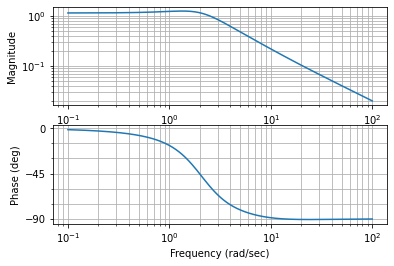

In [ ]:
# bode plot of the system

co.bode_plot(G6);

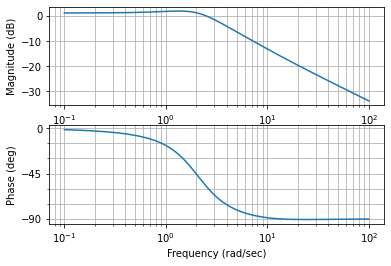

In [ ]:
# bode plot in the decibel scale

co.bode_plot(G6, dB = True);

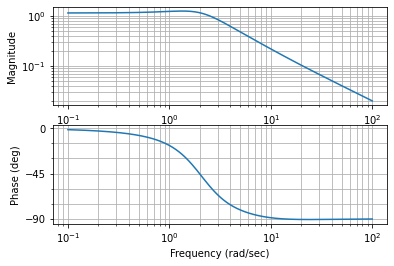

In [ ]:
# extract the magnitude and phase responses as numpy arrays

mag, phase, freq = co.bode_plot(G6);

In [ ]:
'''
co.nyquist_plot(syslist, omega=None, plot=True, omega_limits=None, omega_num=None, 
label_freq=0, color=None, return_contour=False, warn_nyquist=True, *args, **kwargs)

Nyquist plot for a system

Plots a Nyquist plot for the system over a (optional) frequency range.
The curve is computed by evaluating the Nyqist segment along the positive
imaginary axis, with a mirror image generated to reflect the negative
imaginary axis.  Poles on or near the imaginary axis are avoided using a
small indentation.  The portion of the Nyquist contour at infinity is not
explicitly computed (since it maps to a constant value for any system with
a proper transfer function).

Parameters

syslist : list of LTI
    List of linear input/output systems (single system is OK). Nyquist
curves for each system are plotted on the same graph.

plot : boolean
    If True, plot magnitude

omega : array_like
    Set of frequencies to be evaluated, in rad/sec.

omega_limits : array_like of two values
    Limits to the range of frequencies. Ignored if omega is provided, and
auto-generated if omitted.

omega_num : int
    Number of frequency samples to plot.  Defaults to
config.defaults['freqplot.number_of_samples'].

color : string
    Used to specify the color of the line and arrowhead.

mirror_style : string or False
    Linestyle for mirror image of the Nyquist curve.  If False then
omit completely.  Default linestyle ('--') is determined by
config.defaults['nyquist.mirror_style'].

return_contour : bool
    If 'True', return the contour used to evaluate the Nyquist plot.

label_freq : int
    Label every nth frequency on the plot.  If not specified, no labels
are generated.

arrows : int or 1D/2D array of floats
    Specify the number of arrows to plot on the Nyquist curve.  If an
integer is passed. that number of equally spaced arrows will be
plotted on each of the primary segment and the mirror image.  If a 1D
array is passed, it should consist of a sorted list of floats between
0 and 1, indicating the location along the curve to plot an arrow.  If
a 2D array is passed, the first row will be used to specify arrow
locations for the primary curve and the second row will be used for
the mirror image.

arrow_size : float
    Arrowhead width and length (in display coordinates).  Default value is
8 and can be set using config.defaults['nyquist.arrow_size'].

arrow_style : matplotlib.patches.ArrowStyle
    Define style used for Nyquist curve arrows (overrides arrow_size).

indent_radius : float
    Amount to indent the Nyquist contour around poles that are at or near
the imaginary axis.

indent_direction : str
    For poles on the imaginary axis, set the direction of indentation to
be 'right' (default), 'left', or 'none'.

warn_nyquist : bool, optional
    If set to 'False', turn off warnings about frequencies above Nyquist.

*args : matplotlib.pyplot.plot positional properties, optional
    Additional arguments for matplotlib plots (color, linestyle, etc)

**kwargs : matplotlib.pyplot.plot keyword properties, optional
    Additional keywords (passed to matplotlib)

Returns

count : int (or list of int if len(syslist) > 1)
    Number of encirclements of the point -1 by the Nyquist curve.  If
multiple systems are given, an array of counts is returned.

contour : ndarray (or list of ndarray if len(syslist) > 1)), optional
    The contour used to create the primary Nyquist curve segment.  To
obtain the Nyquist curve values, evaluate system(s) along contour.
'''

G =  
     10
-------------
s^2 + 2 s + 1



0

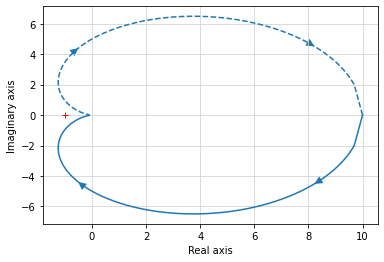

In [ ]:
# nyquist plot

G = co.tf([10],[1,2,1])
print('G = ',G)
co.nyquist_plot(G)

In [ ]:
'''
def stability_margins(sysdata, returnall=False, epsw=0.0, method='best')

Calculate stability margins and associated crossover frequencies.

Parameters

sysdata : LTI system or (mag, phase, omega) sequence
    sys : LTI system
        Linear SISO system representing the loop transfer function
    mag, phase, omega : sequence of array_like
        Arrays of magnitudes (absolute values, not dB), phases (degrees),
and corresponding frequencies. Crossover frequencies returned are
in the same units as those in omega (e.g., rad/sec or Hz).
returnall : bool, optional
    If true, return all margins found. If False (default), return only the
minimum stability margins. For frequency data or FRD systems, only
margins in the given frequency region can be found and returned.
epsw : float, optional
    Frequencies below this value (default 0.0) are considered static gain,
and not returned as margin.
method : string, optional
    Method to use (default is 'best'):
    'poly': use polynomial method if passed a LTI system.
    'frd': calculate crossover frequencies using numerical interpolation
of a FrequencyResponseData representation of the system if
passed a LTI system.
    'best': use the 'poly' method if possible, reverting to 'frd' if it is
detected that numerical inaccuracy is likey to arise in the 'poly'
method for for discrete-time systems.

Returns

gm : float or array_like
    Gain margin
pm : float or array_loke
    Phase margin
sm : float or array_like
    Stability margin, the minimum distance from the Nyquist plot to -1
wpc : float or array_like
    Phase crossover frequency (where phase crosses -180 degrees)
wgc : float or array_like
    Gain crossover frequency (where gain crosses 1)
wms : float or array_like
    Stability margin frequency (where Nyquist plot is closest to -1)

Note that the gain margin is determined by the gain of the loop
transfer function at the phase crossover frequency(s), the phase
margin is determined by the phase of the loop transfer function at
the gain crossover frequency(s), and the stability margin is
determined by the frequency of maximum sensitivity (given by the
magnitude of 1/(1+L)).
'''

In [ ]:
# calculating stability margins of a system

G8=co.tf([10],np.poly([-1,-2,-3]))
GM,PM,c,PCF,GCF,f=co.stability_margins(G8)
print(f'PCF = {PCF}, GM (abs) = {GM}, GCF = {GCF}, PM (deg) = {PM}')

PCF = 3.3166247903554, GM (abs) = 6.0, GCF = 1.0, PM (deg) = 90.0


In [ ]:
'''
def root_locus(sys, kvect=None, xlim=None, ylim=None, plotstr=None, plot=True, 
print_gain=None, grid=None, ax=None, **kwargs)

Root locus plot

Calculate the root locus by finding the roots of 1+k*TF(s)
where TF is self.num(s)/self.den(s) and each k is an element
of kvect.

Parameters

sys : LTI object
    Linear input/output systems (SISO only, for now).
kvect : list or ndarray, optional
    List of gains to use in computing diagram.
xlim : tuple or list, optional
    Set limits of x axis, normally with tuple
    (see matplotlib:api/axes_api).
ylim : tuple or list, optional
    Set limits of y axis, normally with tuple
    (see matplotlib:api/axes_api).
plotstr : matplotlib.pyplot.plot format string, optional
    plotting style specification
plot : boolean, optional
    If True (default), plot root locus diagram.
print_gain : bool
    If True (default), report mouse clicks when close to the root locus
branches, calculate gain, damping and print.
grid : bool
    If True plot omega-damping grid.  Default is False.
ax : matplotlib.axes.Axes
    Axes on which to create root locus plot

Returns

rlist : ndarray
    Computed root locations, given as a 2D array
klist : ndarray or list
    Gains used.  Same as klist keyword argument if provided.
'''

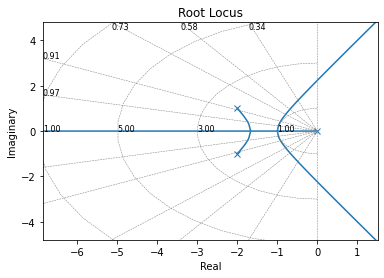

In [ ]:
# root locus

G9=co.tf([1],[1,4,5,0])
co.root_locus(G9);

In [ ]:
'''
A = System Matrix 
B = Input Matrix
C = Output Matrix
D = Feed through Matrix

The state controllability condition implies that it is possible by 
admissible inputs to steer the states from any initial value 
to any final value within some finite time window.

Controllability Matrix=[B , AB , A^2B , ...]

Observability is a measure for how well internal states of a system 
can be inferred by knowledge of its external outputs.

Observability Matrix=[C , CA, CA^2, ...]
'''

In [ ]:
A=[[0,1,0],[0,0,1],[-1,-2,-3]]
B=[[0],[0],[1]]
C=[1,0,0]
D=0
sys=co.ss(A,B,C,D)

In [ ]:
# controllability matrix

M = co.ctrb(A,B)
M

array([[ 0.,  0.,  1.],
       [ 0.,  1., -3.],
       [ 1., -3.,  7.]])

In [ ]:
np.linalg.matrix_rank(M)

3

In [ ]:
# observability matrix

N = co.obsv(A,C)
N

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.linalg.matrix_rank(N)

3

In [ ]:
# calculation of gain for linear state variable feedback or pole placement

'''
Pole placement(Linear state variable feedback) : 
Full state feedback (FSF), or pole placement, is a method employed in 
feedback control system theory to place the closed-loop poles of 
a plant in pre-determined locations in the s-plane.
'''

np.linalg.eigvals(A)

array([-2.32471796+0.j        , -0.33764102+0.56227951j,
       -0.33764102-0.56227951j])

In [ ]:
'''
def place(A, B, p)

Place closed loop eigenvalues

K = place(A, B, p)

Parameters

A : 2D array_like
    Dynamics matrix
B : 2D array_like
    Input matrix
p : 1D array_like
    Desired eigenvalue locations

Returns

K : 2D array (or matrix)
    Gain such that A - B K has eigenvalues given in p
'''

In [ ]:
# place closed loop eigenvalues to desired location, it will return gain matrix K

co.place(A,B,[-1,-2,3])

array([[-7., -9., -3.]])

In [ ]:
# cannonical forms

Desired_controllable_cannonical_form,Transformation_matrix=co.canonical_form(sys,form='reachable')
print(f'Desired_controllable_cannonical_form : \n\n{Desired_controllable_cannonical_form}')

Desired_controllable_cannonical_form : 

A = [[-3. -2. -1.]
     [ 1.  0.  0.]
     [ 0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[0. 0. 1.]]

D = [[0.]]



In [ ]:
Desired_observable_cannonical_form,Transformation_matrix=co.canonical_form(sys,form='observable')
print(f'Desired_observable_cannonical_form : \n\n{Desired_observable_cannonical_form}')

Desired_observable_cannonical_form : 

A = [[-3.  1.  0.]
     [-2.  0.  1.]
     [-1.  0.  0.]]

B = [[0.]
     [0.]
     [1.]]

C = [[1. 0. 0.]]

D = [[0.]]



examples :-

1. Compare the step response of 2nd order systems (without zeros) $G(s)=\dfrac{\omega_n ^2}{s^2+2\zeta\omega_n s + \omega_n ^2}$, for $\omega_n = 1$ (undamped natural freq. = 1 rad/s) and different values of $\zeta$ (the damping ratio).

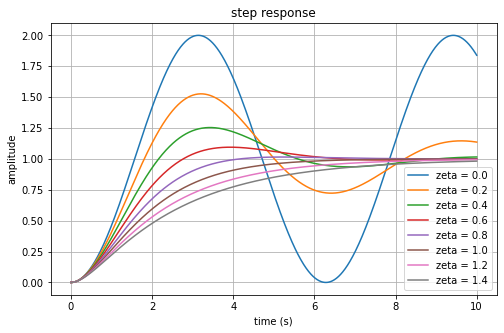

In [ ]:
t = np.linspace(0, 10, 1000)                # time is taken from 0s to 10s
plt.figure(figsize=(8, 5))                  # to make a bigger figure

# we are varying zeta from 0.0 to 1.4 in the steps of 0.2
for zeta in np.arange(0, 1.6, 0.2):   
  # generalized 2nd order system transfer function
  G = co.tf([1], [1, 2*zeta, 1])            # define the transfer function as G
  _, y = co.step_response(G, t)             # calculate the step response of G
  plt.plot(t, y, label=f'zeta = {zeta:.2}') # plot the response

plt.xlabel('time (s)')                      # labels
plt.ylabel('amplitude')                     # labels
plt.title('step response')                  # title
plt.legend()                                # legend for each of the plots
plt.grid()                                  # grid

# as zeta increases the damping increase and the overshoot decreases as the response becomes damped

2. Calculate the response of the system $G_6 = \dfrac{2}{s+2}$ when excited with a square pulse. This is very similar to charging and discharging a series R-C circuit.

In [ ]:
'''
response to an arbitrary input
first order system
create the pulse and feed it as the input to the system - forced_response
'''

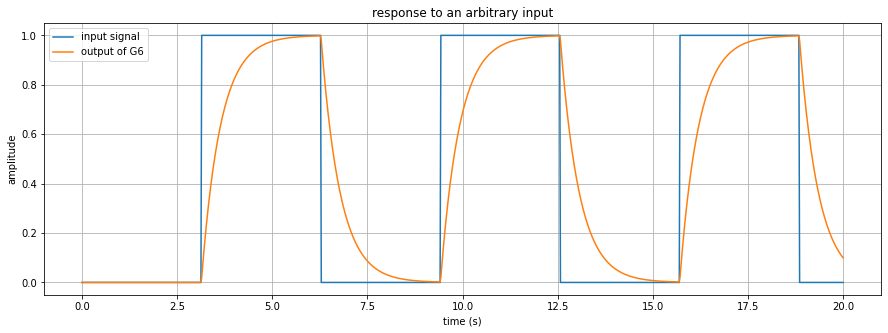

In [ ]:
t = np.linspace(0, 20, 1000)                # time is taken from 0s to 10s
plt.figure(figsize=(15, 5))                 # to make a long figure

x = np.array(np.sin(t) < 0, dtype='float')  # let us create a square pulse
plt.plot(t, x, label='input signal')        # and plot it

G6 = co.tf([2], [1, 2])                     # define the system G6
# calculate the response of G6 when the input is the square pulse input x
_, y  = co.forced_response(G6, t, x)        # sys time and input array

plt.plot(t, y, label='output of G6')        # plot the output
plt.xlabel('time (s)')                      # labels
plt.ylabel('amplitude')                     # labels
plt.title('response to an arbitrary input') # title
plt.legend()                                # legend for each of the plots
plt.grid()                                  # grid     

In [ ]:
### 